<a href="https://colab.research.google.com/github/sugban/Coursera_Capstone/blob/main/Denmark_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install html-table-parser-python3

In [10]:
# Library for opening url and creating requests
import urllib.request
 
# pretty-print python data structures
from pprint import pprint
 
# for parsing all the tables present on the website
from html_table_parser.parser import HTMLTableParser
 
# for converting the parsed data in a pandas dataframe
import pandas as pd 
 
import seaborn as sns
 
# importing matplotlib module for visualization
import matplotlib.pyplot as plt

In [ ]:
# Opens a website and read its binary contents (HTTP Response Body)
def url_get_contents(url):
 
    # making request to the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
 
    # reading contents of the website
    return f.read()

In [ ]:
# defining the html contents of a URL.
xhtml = url_get_contents('https://www.statista.com/statistics/570358/total-population-in-denmark-by-gender/').decode('utf-8')

In [ ]:
# Defining the HTMLTableParser object
p = HTMLTableParser()
 
# feeding the html contents in the HTMLTableParser object
p.feed(xhtml)
 
# Now finally obtaining the data of the table required
table = p.tables[0]
#pprint(table)

# converting the parsed data to datframe
print("\n\nPANDAS DATAFRAME\n")
df_gender = pd.DataFrame(table)
df_gender.set_index(0)



PANDAS DATAFRAME



,1,2
0,,
Characteristic,Male,Female
2021,2.91,2.94
2020,2.9,2.93
2019,2.89,2.92
2018,2.88,2.91
2017,2.86,2.89
2016,2.84,2.87
2015,2.81,2.85
2014,2.79,2.83


In [ ]:
df_gender.set_index(0).to_excel('gender base population in denmark.xlsx')

In [ ]:
df = pd.read_excel('gender base population in denmark.xlsx',header = 1)
df['Total_Population'] = df['Male'] + df['Female']
df.rename(columns = {'Characteristic':'Years'}, inplace = True)
df

,Years,Male,Female,Total_Population
0,2021,2.91,2.94,5.85
1,2020,2.90,2.93,5.83
2,2019,2.89,2.92,5.81
3,2018,2.88,2.91,5.79
4,2017,2.86,2.89,5.75
5,2016,2.84,2.87,5.71
6,2015,2.81,2.85,5.66
7,2014,2.79,2.83,5.62
8,2013,2.78,2.82,5.60
9,2012,2.77,2.81,5.58


In [ ]:
xhtml1 = url_get_contents('https://www.statista.com/statistics/570654/total-population-in-denmark-by-age/').decode('utf-8')

In [ ]:
# Defining the HTMLTableParser object
p = HTMLTableParser()
 
# feeding the html contents in the HTMLTableParser object
p.feed(xhtml1)
 
# Now finally obtaining the data of the table required
table1 = p.tables[0]
#pprint(table1)

# converting the parsed data to datframe
print("\n\nPANDAS DATAFRAME\n")
df_age = pd.DataFrame(table1)
#df_age



PANDAS DATAFRAME



In [ ]:
df_age.set_index(0).to_excel('Population by age-range.xlsx')

In [ ]:
df_age = pd.read_excel('Population by age-range.xlsx',header = 1)
df_age.rename(columns = {'Characteristic':'Years'}, inplace = True)
df_age

,Years,0-19 years,20-39 years,40-59 years,60-79 years,80 years and older
0,2021,1.29,1.48,1.55,1.24,0.28
1,2020,1.30,1.47,1.56,1.23,0.27
2,2019,1.30,1.47,1.56,1.21,0.26
3,2018,1.31,1.46,1.56,1.20,0.26
4,2017,1.31,1.44,1.56,1.19,0.25
5,2016,1.31,1.42,1.56,1.17,0.24
6,2015,1.32,1.40,1.55,1.15,0.24
7,2014,1.33,1.39,1.55,1.13,0.23
8,2013,1.34,1.38,1.54,1.10,0.23
9,2012,1.34,1.38,1.54,1.09,0.23


In [ ]:
new_df = df.merge(df_age, on = 'Years', how = 'inner')
new_df


,Years,Male,Female,Total_Population,0-19 years,20-39 years,40-59 years,60-79 years,80 years and older
0,2021,2.91,2.94,5.85,1.29,1.48,1.55,1.24,0.28
1,2020,2.90,2.93,5.83,1.30,1.47,1.56,1.23,0.27
2,2019,2.89,2.92,5.81,1.30,1.47,1.56,1.21,0.26
3,2018,2.88,2.91,5.79,1.31,1.46,1.56,1.20,0.26
4,2017,2.86,2.89,5.75,1.31,1.44,1.56,1.19,0.25
5,2016,2.84,2.87,5.71,1.31,1.42,1.56,1.17,0.24
6,2015,2.81,2.85,5.66,1.32,1.40,1.55,1.15,0.24
7,2014,2.79,2.83,5.62,1.33,1.39,1.55,1.13,0.23
8,2013,2.78,2.82,5.60,1.34,1.38,1.54,1.10,0.23
9,2012,2.77,2.81,5.58,1.34,1.38,1.54,1.09,0.23


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Total popolation in denmark from 2011-2021')

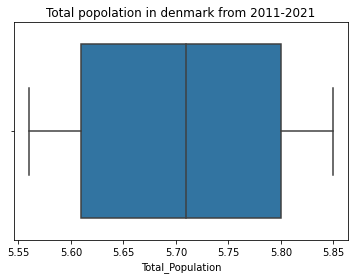

In [ ]:
sns.boxplot(x='Total_Population', data = new_df)
plt.title('Total popolation in denmark from 2011-2021')

Text(0.5, 1.0, 'Gender-wise and Total Population in Denmark')

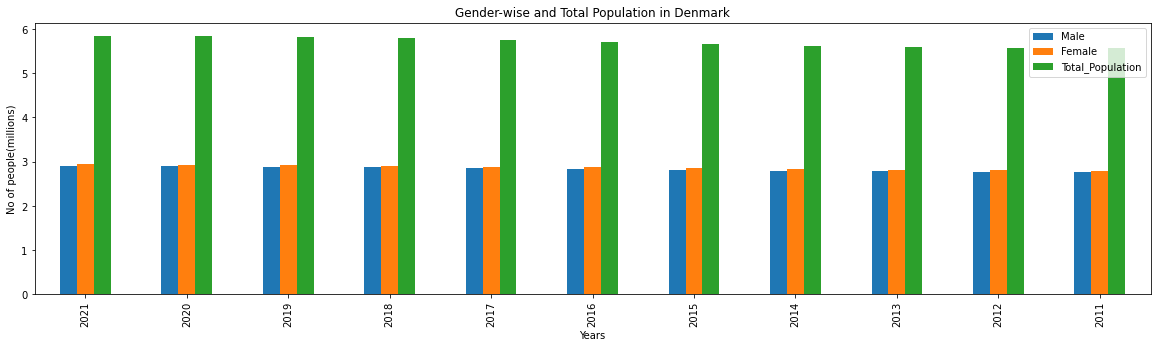

In [ ]:
new_df.plot(x ='Years', y=['Male','Female','Total_Population'], kind = 'bar', figsize=(20, 5))
plt.ylabel('No of people(millions)')
plt.xlabel('Years')
plt.title('Gender-wise and Total Population in Denmark')

This plot shows us the total population and also the number of male and female population in Denmark. Females number are always slightly higher than males but if we observe closely that difference is slowly coming down and almost half of the population is shared by both the genders. 
Denmark believes in equality and brings the opportunity for both the genders equally in the socitey.


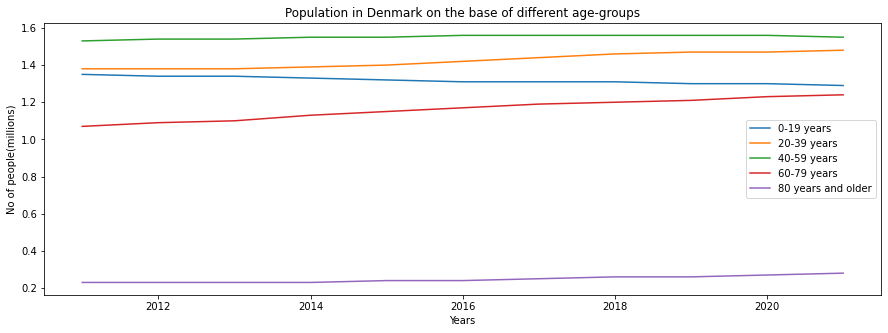

In [ ]:
new_df.plot(x ='Years', y=['0-19 years','20-39 years','40-59 years','60-79 years','80 years and older'], kind = 'line', figsize=(15, 5))
plt.ylabel('No of people(millions)')
plt.xlabel('Years')
plt.title('Population in Denmark on the base of different age-groups')
plt.show()

In this plot we can see that the most number of people in denmark are of age 40-59, and there is a gap of young generation 0-19. That means in future there will be shortage of working people in the society, who can contribute in welfare income. So govenment should take actions accordingly, which can bring balance in the socitey for futur, like pension scheme, or child benfit payment and more. They should also encourage or bbring such schemes in the society so that young generation stay in Denmark and can help economy to grow. 

This plot also shows life expectancy also. There is very less generation of older people, that means either people are dying in young age or they are moving in other countries. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/PYTHON   SQL   EXCEL"

 color_data.csv						    notebook.ipynb
'Denmark_Crime_Regionwise - Denmark_Crime_Regionwise.csv'   postcode.xlsx
 netflix_data.csv


In [11]:
df_crime = pd.read_csv("/content/drive/My Drive/PYTHON   SQL   EXCEL/Denmark_Crime_Regionwise - Denmark_Crime_Regionwise.csv")
#df_crime

In [12]:
df_crime.drop(['2007Q1','2007Q2','2007Q3','2007Q4','2008Q1','2008Q2','2008Q3','2008Q4','2009Q1','2009Q2','2009Q3','2009Q4','2010Q1','2010Q2','2010Q3','2010Q4'],axis = 1,inplace = True)
#df_crime.head()

In [13]:
import numpy as np

df_crime['REGION'].replace(r'Unknown municipality', np.nan, inplace = True)
df_crime.replace(0, np.nan, inplace = True)
df_crime = df_crime.dropna()

In [14]:
df_crime['2011'] = df_crime['2011Q1'] + df_crime['2011Q2'] + df_crime['2011Q3'] + df_crime['2011Q4']

In [15]:
df_crime['2012'] = df_crime['2012Q1'] + df_crime['2012Q2'] + df_crime['2012Q3'] + df_crime['2012Q4']
#df_crime['2012']

In [16]:
df_crime['2013'] = df_crime['2013Q1'] + df_crime['2013Q2'] + df_crime['2013Q3'] + df_crime['2013Q4']
#df_crime['2013']

In [17]:
df_crime['2014'] = df_crime['2014Q1'] + df_crime['2014Q2'] + df_crime['2014Q3'] + df_crime['2014Q4']

In [18]:
df_crime['2015'] = df_crime['2015Q1'] + df_crime['2015Q2'] + df_crime['2015Q3'] + df_crime['2015Q4']

In [19]:
df_crime['2016'] = df_crime['2016Q1'] + df_crime['2016Q2'] + df_crime['2016Q3'] + df_crime['2016Q4']

In [20]:
df_crime['2017'] = df_crime['2017Q1'] + df_crime['2017Q2'] + df_crime['2017Q3'] + df_crime['2017Q4']

In [21]:
df_crime['2018'] = df_crime['2018Q1'] + df_crime['2018Q2'] + df_crime['2018Q3'] + df_crime['2018Q4']

In [22]:
df_crime['2019'] = df_crime['2019Q1'] + df_crime['2019Q2'] + df_crime['2019Q3']

In [23]:
df_crime_2011_2019 = df_crime[['REGION','TYPE OF OFFENCE','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
df_crime_2011_2019

,REGION,TYPE OF OFFENCE,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Region Hovedstaden,"Nature of the offence, total",202970.0,204274.0,208816.0,202023.0,193120.0,202452.0,189518.0,181544.0,133848.0
1,Region Hovedstaden,"Penal Code, total",175579.0,175146.0,172440.0,163923.0,158254.0,165432.0,153951.0,140684.0,99781.0
3,Region Hovedstaden,"Sexual offenses, total",610.0,667.0,653.0,574.0,705.0,1522.0,1526.0,2221.0,1063.0
5,Region Hovedstaden,"Rape, etc.",86.0,89.0,103.0,113.0,127.0,234.0,284.0,299.0,215.0
13,Region Hovedstaden,Offence against public decency by groping,128.0,124.0,124.0,122.0,186.0,214.0,266.0,270.0,201.0
...,...,...,...,...,...,...,...,...,...,...,...
9351,Aalborg,The environmental protection act,57.0,87.0,71.0,186.0,103.0,97.0,66.0,98.0,61.0
9352,Aalborg,"Legislation on animals, hunting, etc.",251.0,214.0,185.0,185.0,128.0,106.0,104.0,148.0,109.0
9353,Aalborg,"Legislation on employment, transport, etc.",146.0,129.0,231.0,205.0,203.0,219.0,272.0,239.0,232.0
9355,Aalborg,Legislation on the national defence,119.0,287.0,503.0,544.0,468.0,1039.0,1114.0,720.0,339.0


In [ ]:
df_crime_plot = df_crime_2011_2019.groupby(['REGION'])['TYPE OF OFFENCE'].count().reset_index()
df_crime_plot

,REGION,TYPE OF OFFENCE
0,Aabenraa,33
1,Aalborg,44
2,Aarhus,49
3,Albertslund,26
4,Allerød,19
...,...,...
98,Vejle,34
99,Vesthimmerlands,26
100,Viborg,28
101,Vordingborg,26


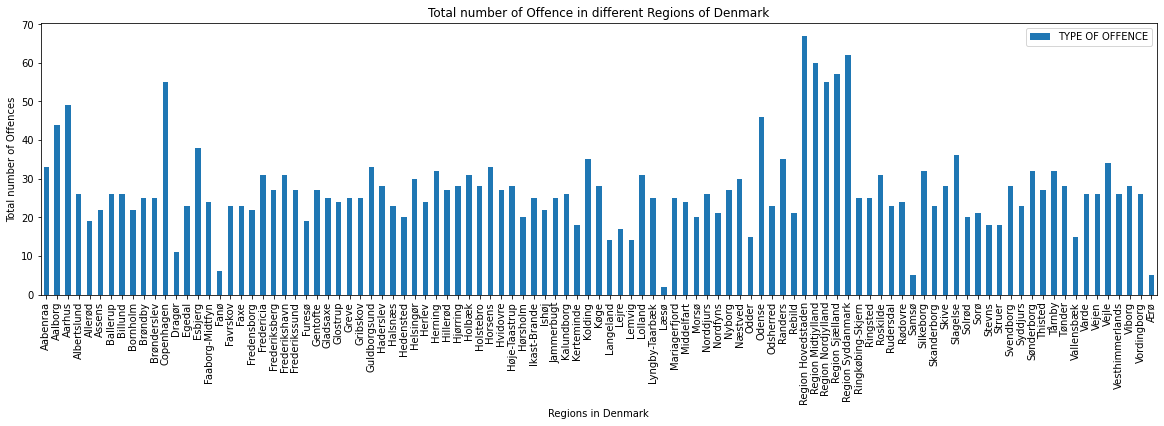

In [ ]:
df_crime_plot.plot(x ='REGION', y='TYPE OF OFFENCE', kind = 'bar',figsize=(20, 5))
plt.ylabel('Total number of Offences')
plt.xlabel('Regions in Denmark')
plt.title('Total number of Offence in different Regions of Denmark')
plt.show()

In this plot we can see regions in denmark with the numbers of crimes happened in these regions within the time period of 2011-2019. 
As we can see that most of the numbers are registered in 'Copenhagen','Aarhus','Aalborg' and 'Odense'. Being big city, these cities have more exposure, so there is also more crime reported. The safest area to live in Denmark is Læsø, Samsø and Ærø, where the crime reports are less. 

In [ ]:
df_crime_plot1 = df_crime_2011_2019.groupby(['TYPE OF OFFENCE'])['2019','2018','2017','2016'].sum().reset_index()
df_crime_plot1.sort_values(['2019','2018','2017','2016'], ascending=False, inplace=True)
df_crime_plot2 = df_crime_plot1[:10]
df_crime_plot2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,TYPE OF OFFENCE,2019,2018,2017,2016
31,"Nature of the offence, total",649544.0,895099.0,911937.0,931438.0
44,"Penal Code, total",456584.0,660134.0,712475.0,741946.0
37,"Offences against property, total",395830.0,578929.0,639028.0,677855.0
53,"Special acts, total",192898.0,234680.0,199273.0,189435.0
41,Other kinds of theft,92588.0,145553.0,195713.0,213332.0
43,Other special acts in criminal law,76242.0,92727.0,79594.0,76563.0
60,Theft of/taking bicycle without the owners con...,69508.0,93068.0,96133.0,104869.0
14,Euphoriants Act,43922.0,53651.0,47376.0,41797.0
12,"Crimes of violence, total",39239.0,51930.0,50550.0,41939.0
48,Residential burglaries,34149.0,57413.0,58203.0,63451.0


TypeError: ignored

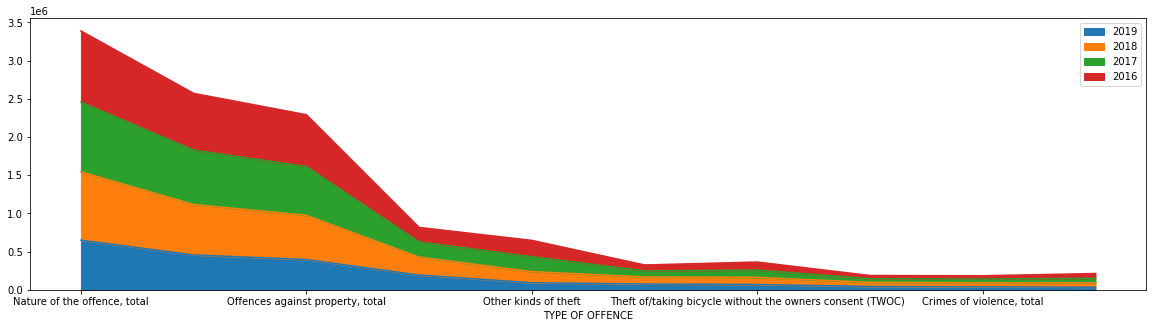

In [ ]:
df_crime_plot2.plot(x = 'TYPE OF OFFENCE', y= ['2019','2018','2017','2016'], kind = 'area',figsize=(20, 5))
plt.ylabel('Total number of Offence')
plt.xlabel('TYPE OF OFFENCE')
plt.title('Total number of offences year 2019-2016 in Denmark')
plt.show()

In this plot we can see the crime rate has come down from 2016 to 2019, which is a good sign. But there is till some offence is on high number.

In [ ]:
df_crime_plot4 = df_crime_2011_2019.groupby(['REGION'])['2019','2018','2017','2016'].sum().reset_index()
df_crime_plot4.sort_values(['2019','2018','2017','2016'], ascending=False, inplace=True)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


TypeError: ignored

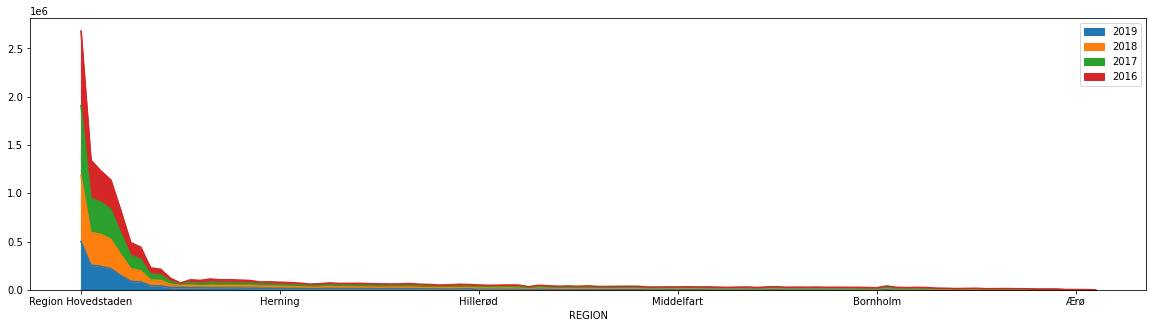

In [ ]:
df_crime_plot4.plot(x='REGION',y=['2019','2018','2017','2016'], figsize=(20, 5), kind='area')
plt.ylabel('Total number of Offence')
plt.xlabel('Region')
plt.title('10 Highest number of offences in regions of Denmark through year 2019-2016')
plt.show()

Region hovestaden has the highest number of crimes. we can say, being a capital it is most populated and exposed area. So the number of crimes happenes in Region hovedstaden are the highest. Now we need to find which kommune has the highest number, so that we can prevent the crimes and make the society to live a better place.

In [34]:
df_hovedstaden = pd.read_excel('/content/drive/My Drive/PYTHON   SQL   EXCEL/postcode.xlsx')

In [35]:
df_hovedstaden.rename(columns = {'Region Hovedstaden':'REGION'}, inplace = True)
df_hovedstaden

,REGION,Postcode,Population
0,Albertslund,2620,30000
1,Allerod,3450,16762
2,Ballerup,2750,48231
3,Bornholm,3700,39570
4,Brondby,2605,35094
5,Christianso,3760,90
6,Dragor,2791,14494
7,Egedal,3540,42297
8,Fredensborg,3480,39551
9,Frederiksberg,2000,105037


In [36]:
df_hovedstaden = df_hovedstaden.merge(df_crime_2011_2019, on='REGION', how= 'inner' )
df_hovedstaden.head()


,REGION,Postcode,Population,TYPE OF OFFENCE,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Bornholm,3700,39570,"Nature of the offence, total",1614.0,1783.0,2112.0,1860.0,1779.0,1718.0,1634.0,1559.0,1327.0
1,Bornholm,3700,39570,"Penal Code, total",1178.0,1334.0,1415.0,1223.0,1165.0,1157.0,1092.0,920.0,706.0
2,Bornholm,3700,39570,"Crimes of violence, total",120.0,128.0,149.0,170.0,142.0,153.0,162.0,157.0,121.0
3,Bornholm,3700,39570,Common assault,60.0,59.0,77.0,67.0,57.0,82.0,56.0,63.0,49.0
4,Bornholm,3700,39570,Threats,21.0,30.0,37.0,53.0,34.0,37.0,32.0,29.0,42.0


In [37]:
df_hovedstaden_plot = df_hovedstaden.groupby(['REGION'])['2019','2018','2017','2016'].sum().reset_index()
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [40]:
df_hovedstaden_plot.sort_values(['2019','2018','2017','2016'], ascending=False, inplace=True) 
df_hovedstaden_plot.head()

,REGION,2019,2018,2017,2016
3,Gentofte,15269.0,21762.0,23431.0,22504.0
4,Gladsaxe,11864.0,16940.0,17147.0,17989.0
6,Hvidovre,11333.0,16413.0,17663.0,16142.0
7,Rudersdal,9806.0,13592.0,14337.0,14094.0
2,Frederikssund,7339.0,9478.0,10229.0,10418.0


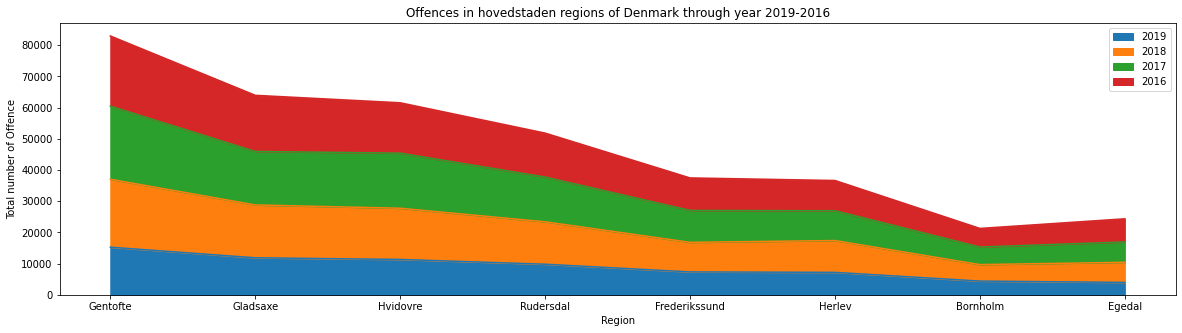

In [39]:
df_hovedstaden_plot.plot(x='REGION',y=['2019','2018','2017','2016'], figsize=(20, 5), kind='area')
plt.ylabel('Total number of Offence')
plt.xlabel('Region')
plt.title('Offences in hovedstaden regions of Denmark through year 2019-2016')
plt.show()

In [41]:
df_hovedstaden_count = df_hovedstaden.groupby(['REGION'])['TYPE OF OFFENCE'].count().reset_index()
df_hovedstaden_count

,REGION,TYPE OF OFFENCE
0,Bornholm,22
1,Egedal,23
2,Frederikssund,27
3,Gentofte,27
4,Gladsaxe,25
5,Herlev,24
6,Hvidovre,27
7,Rudersdal,23


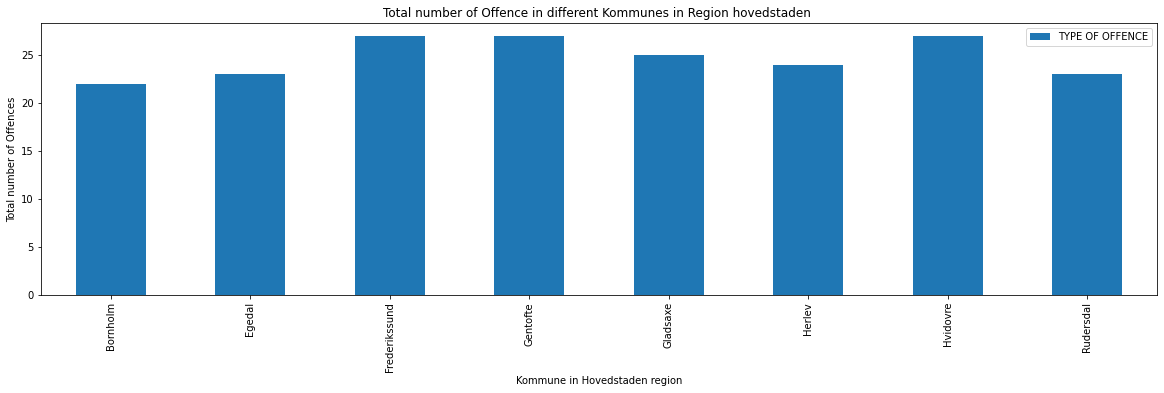

In [42]:
df_hovedstaden_count.plot(x ='REGION', y='TYPE OF OFFENCE', kind = 'bar',figsize=(20, 5))
plt.ylabel('Total number of Offences')
plt.xlabel('Kommune in Hovedstaden region')
plt.title('Total number of Offence in different Kommunes in Region hovedstaden ')
plt.show()

We can see that in Frederikssund, Gentofte and Hvidovre kommune, there is high number of offences reported. 